In [8]:
# Import libraries
import numpy as np
import pandas as pd

# Import data
df = pd.read_csv("game_reviews.csv")

# View the data
print(df.shape)
df.head()

(15000, 9)


,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [9]:
# Check the number of duplicate values in the COMMENTS column
df.reviewText.duplicated().sum()

605

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [11]:
df.dropna(subset=['reviewText'], inplace=True)
df.shape

(14990, 9)

In [12]:
# Check the number of duplicate values in the COMMENTS column
df.reviewText.duplicated().sum()

596

In [13]:
# I used keep=last to drop duplicates keeping the last occurrence
survey=df.drop_duplicates(keep='last')
survey.shape

(14982, 9)

In [14]:
#Convert the sentences into lowercase 
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviewText'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: reviewText, dtype: object

In [15]:
#Remove punctuation marks to standardise the text.
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]','')
df['reviewText'].head()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_15000/3856477541.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText'] = df['reviewText'].str.replace('[^\w\s]','')


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [16]:
survey.reviewText.drop_duplicates(keep='last')
survey.shape

(14982, 9)

In [17]:
survey.reviewText.duplicated().sum()

588

In [18]:
# Drop duplicates
survey = df.drop_duplicates(subset=['reviewText'])
survey.shape

(14081, 9)

In [98]:
# Preview data
survey.reset_index(inplace=True)
survey.head()

,index,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,when it comes to a dms screen the space on the...,The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9 your unpainted mi...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
3,3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
4,4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN


In [99]:
# String all the comments together in a single variable
all_comments = ''
for i in range(survey.shape[0]):
    all_comments = all_comments + survey['reviewText'][i]

In [58]:
!pip install WordCloud

In [100]:
# Import along with matplotlib and seaborn for visualisation
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [102]:
# install NLTK library
!pip install nltk

# Import all necessary libraries.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cynthia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


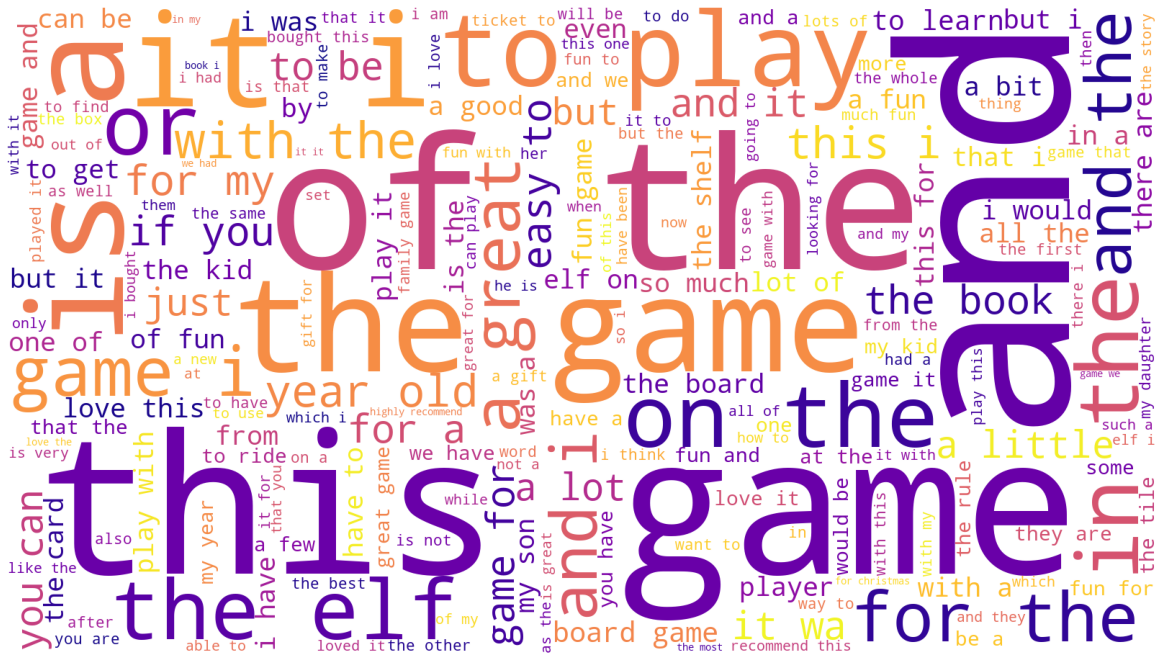

In [101]:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap ='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [103]:
#Tokenize the words.
survey['tokens'] = survey['reviewText'].apply(word_tokenize)
#Preview the resultreviewText
survey['tokens'].head()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_24140/10939587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['tokens'] = survey['reviewText'].apply(word_tokenize)


0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [104]:
# Combine all tokens into one empty list
all_tokens = []
for i in range(survey.shape[0]):
    all_tokens = all_tokens + survey['tokens'][i]

In [71]:
# Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

In [105]:
#  Compute the tokens with the maximum frequency
from nltk.probability import FreqDist
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 32797, 'to': 21453, 'and': 21000, 'a': 18570, 'it': 15144, 'i': 12845, 'game': 12379, 'this': 12257, 'is': 12169, 'of': 11815, ...})

In [ ]:
# Import nltk and download nltk's resources to assist with tokenization
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
#  Compute the tokens with the maximum frequency
from nltk.probability import FreqDist
fdist = FreqDist(all_tokens)
fdist

In [72]:
# Download the nltk resource, import the method, and extract stopwords in the English language.
nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cynthia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# Create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

In [74]:
#Define on empty string variable.
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

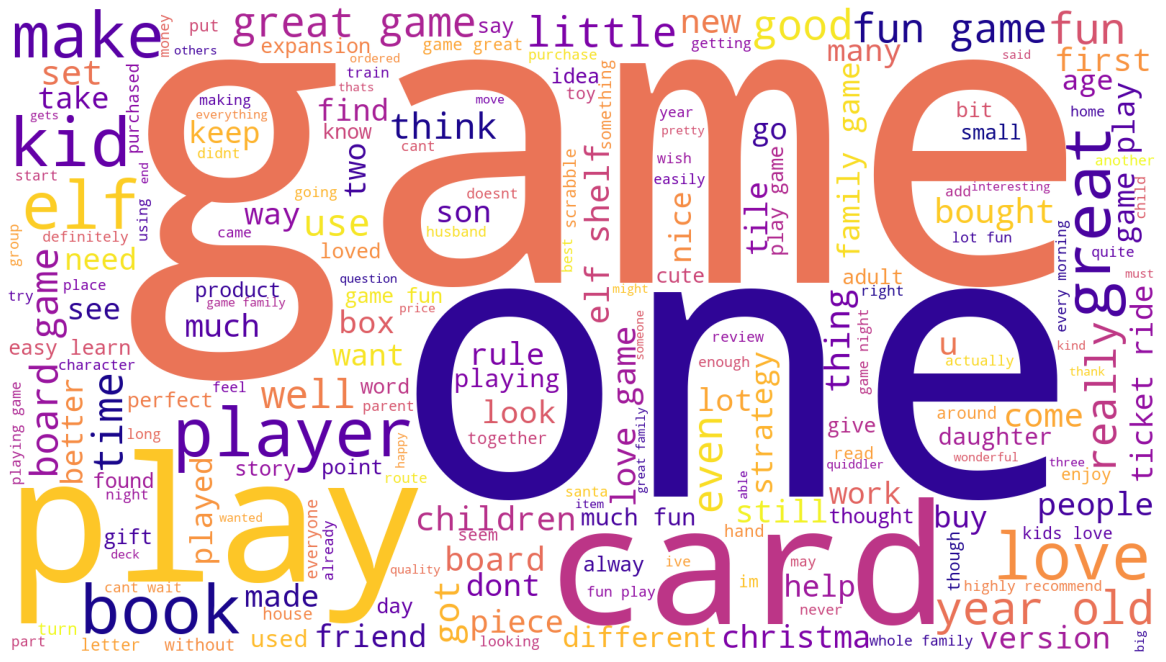

In [75]:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [76]:
# View the frequency distribution
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'game': 12741, 'fun': 5371, 'great': 4337, 'play': 4156, 'elf': 3313, 'love': 3201, 'one': 2988, 'family': 2895, 'kids': 2526, 'like': 2284, ...})

In [108]:
'''top 20 commonly used words across the comments.'''
# Import Counter
from collections import Counter

# Generate DF out of Counter
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,12741
fun,5371
great,4337
play,4156
elf,3313
love,3201
one,2988
family,2895
kids,2526


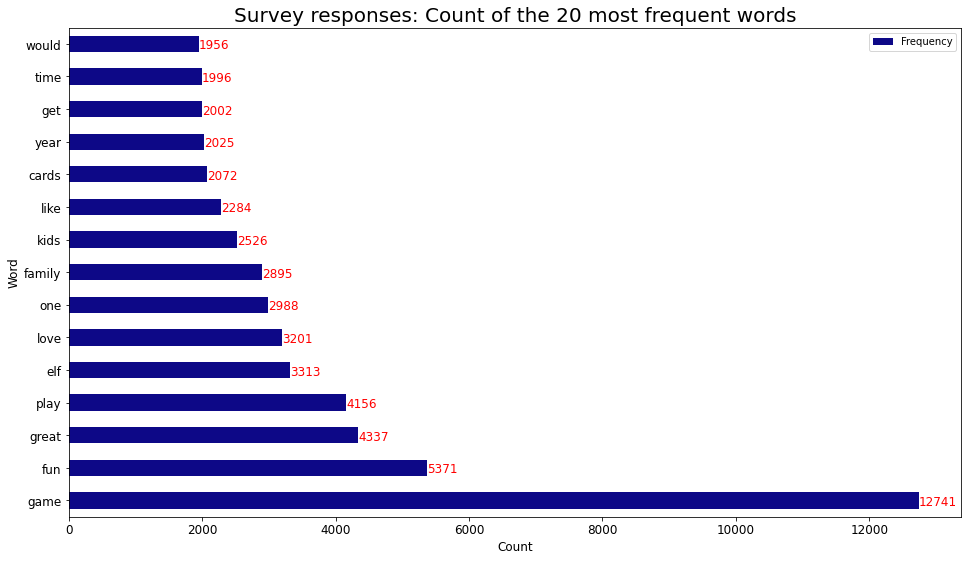

In [122]:
# Generate bar graph
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Survey responses: Count of the 20 most frequent words", fontsize=20)

# Add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

In [79]:
# Install TextBlob
!pip install textblob

# Import
from textblob import TextBlob

In [109]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
survey['polarity'] = survey['reviewText'].apply(generate_polarity)

# [3] Preview the result.
survey['polarity'].head()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_24140/551845216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['polarity'] = survey['reviewText'].apply(generate_polarity)


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [110]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
survey['subjectivity'] = survey['reviewText'].apply(generate_subjectivity)

# Preview the result.
survey['subjectivity'].head()

C:\Users\Cynthia\AppData\Local\Temp/ipykernel_24140/2261442980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['subjectivity'] = survey['reviewText'].apply(generate_subjectivity)


0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

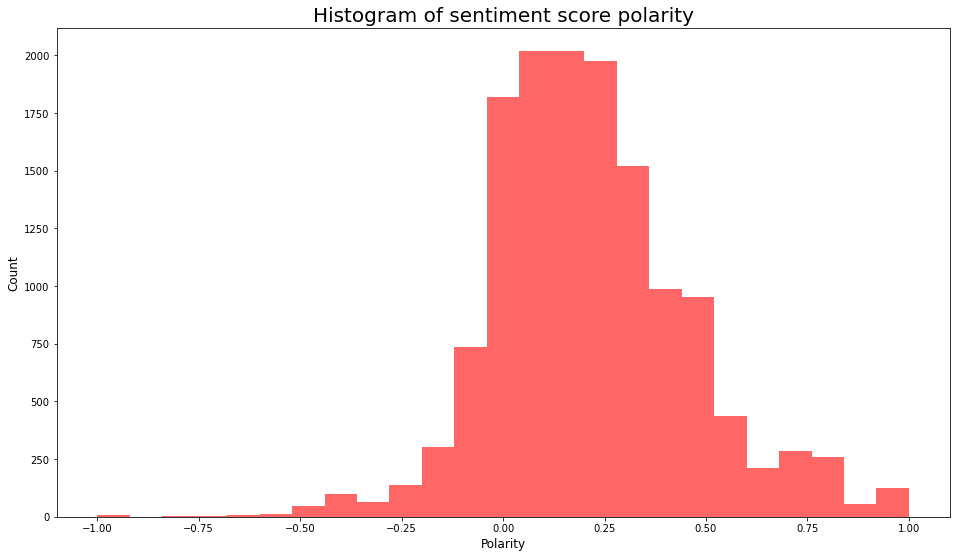

In [112]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(survey['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();

In [113]:
# [1] Create a DataFrame.
positive_sentiment = survey.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewText', 'summary','polarity', 'subjectivity']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,summary,polarity,subjectivity
7,came in perfect condition,Five Stars,1.000000,1.000000
164,awesome book,Five Stars,1.000000,1.000000
193,awesome gift,Five Stars,1.000000,1.000000
489,excellent activity for teaching selfmanagement skills,Five Stars,1.000000,1.000000
517,perfect just what i ordered,Five Stars,1.000000,1.000000
583,wonderful product,Five Stars,1.000000,1.000000
601,delightful product,Five Stars,1.000000,1.000000
613,wonderful for my grandson to learn the resurrection story,Five Stars,1.000000,1.000000
782,perfect,Aquire game,1.000000,1.000000
922,awesome,Five Stars,1.000000,1.000000


In [114]:
# Create a DataFrame.
negative_sentiment = survey.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewText', 'summary','polarity', 'subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,summary,polarity,subjectivity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM ...,-1.000000,1.000000
1987,kids did not like it thought it was boring,Not so much fun,-1.000000,1.000000
3218,some of the suggestions are disgusting,One Star,-1.000000,1.000000
7812,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,Not What Was Advertised,-1.000000,1.000000
7515,was the elf on the shelf but it didnt have the dvd i was very disappointed,Three Stars,-0.975000,0.975000
8861,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,Poor quality. Falling apart in multiple places.,-0.975000,0.975000
8198,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,I hate the holidays bcuz of the Elf,-0.866667,0.933333
12386,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,What i do not under stand,-0.800000,0.900000
8531,cliche and stupid i should not drink and amazon,Hahaha. Ho Ho Ho.,-0.800000,1.000000
8638,just stupid,One Star,-0.800000,1.000000


<AxesSubplot:>

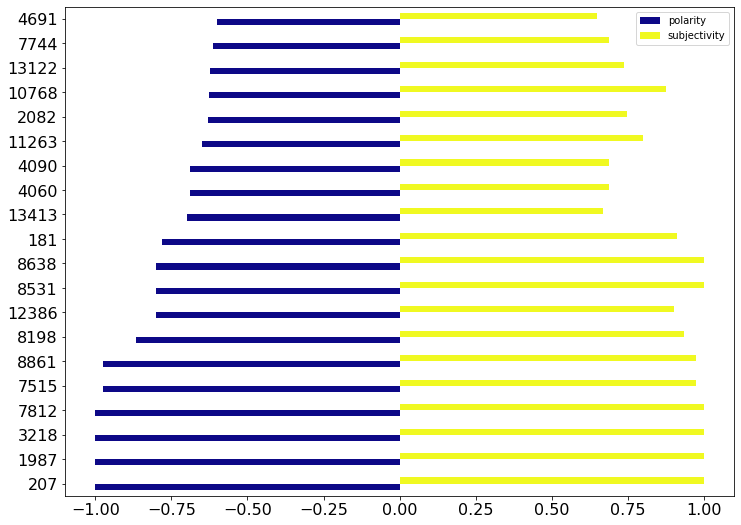

In [121]:
negative_sentiment.plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

In [126]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(negative_sentiment['reviewText'])

In [127]:
#Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
like              0      1      0      0      0      0      0      1      0   
disappointed      0      0      0      0      1      1      0      0      0   
play              0      0      0      0      0      0      0      2      0   
did               1      1      0      1      0      0      0      0      0   
hate              0      0      0      0      0      0      2      1      0   
box               0      0      0      0      0      1      0      0      0   
elf               0      0      0      1      1      0      1      0      0   
book              0      0      0      2      0      0      0      0      0   
score             0      0      0      0      0      0      0      2      0   
product           0      0      0      0      0      1      0      0      0   

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
like               0       0       1       0       3       0  
disa

C:\Users\Cynthia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

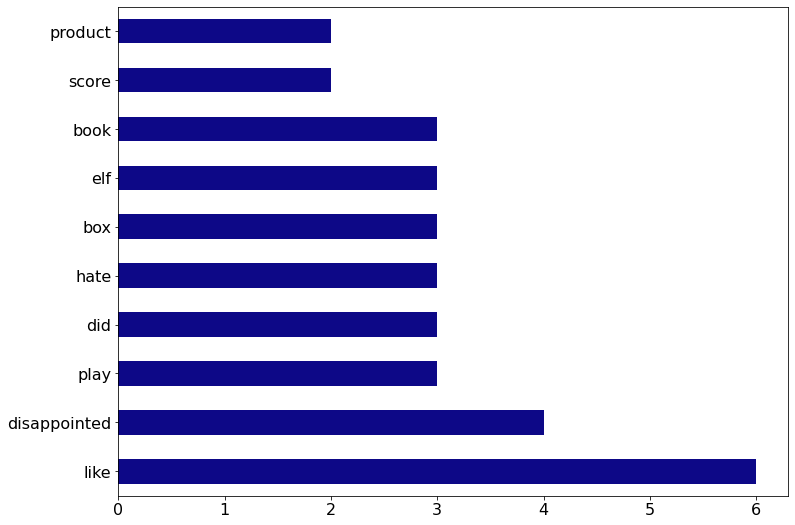

In [128]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

In [129]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(positive_sentiment['reviewText'])

In [130]:
#Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
awesome           0      1      1      0      0      0      0      0      0   
perfect           1      0      0      0      1      0      0      0      1   
wonderful         0      0      0      0      0      1      0      1      0   
best              0      0      0      0      0      0      0      0      0   
set               0      0      0      0      0      0      0      0      0   
product           0      0      0      0      0      1      1      0      0   
resurrection      0      0      0      0      0      0      0      1      0   
learn             0      0      0      0      0      0      0      1      0   
means             0      0      0      0      0      0      0      0      0   
ordered           0      0      0      0      1      0      0      0      0   

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
awesome            1       1       0       1       1       0  
perf

C:\Users\Cynthia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

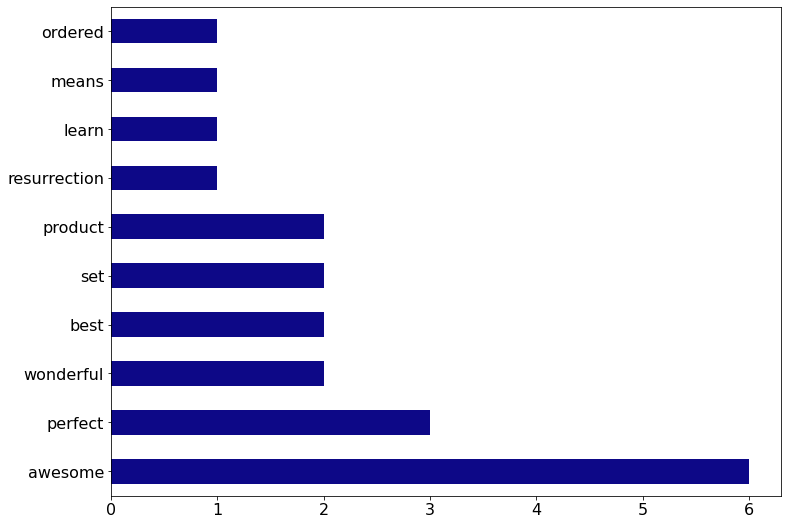

In [131]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

In [ ]:
#pd.set_option("display.max_rows", None)
#review_data.loc[review_data.duplicated(subset=['reviewerID'], keep=False), :]

# Remove unverified (i.e. 'verified' column is equal to False) comments
#review_data.drop(review_data[review_data['verified'] == False].index, inplace = True)
#review_data.shape



